# Wine Quality

In [127]:
# Importing the Important Python Libraries
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [128]:
# loading the Dataframe
df = pd.read_csv('WineQT.csv')

In [129]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [130]:
#checking null value 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [131]:
# Dropping the Unique Identifier, as it provide no solid Information
df.drop(columns='Id',inplace=True)
df.shape

(1143, 12)

In [132]:
# Describe value data set
df.describe().round(2) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


In [133]:
#As we are looking for the wine quality, so we will choose 'Quality' as our output variable "y"

# checking the all unique values in column 'quality'
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


* As we can see the wine quality ranges from 3 to 5, where 3 be the worst and 8 be the Best!
Here is problem, as we are lookng for a classification Problem, but the quality is a range not in a binary situation. So by following steps we can solve that!


 - Define a Threshold to Separate Classes
  Decide on a threshold that will divide the quality values into two categories. 
   For example:
    * Low Quality (0): If quality is below a certain threshold, label it as 0.
    * High Quality (1): If quality is above or equal to that threshold, label it as 1.
* A common approach is to split the range in the middle, such as:
    * If quality <= 5, assign it to the "Low Quality" class (0).
    * If quality > 5, assign it to the "High Quality" class (1).

<Axes: >

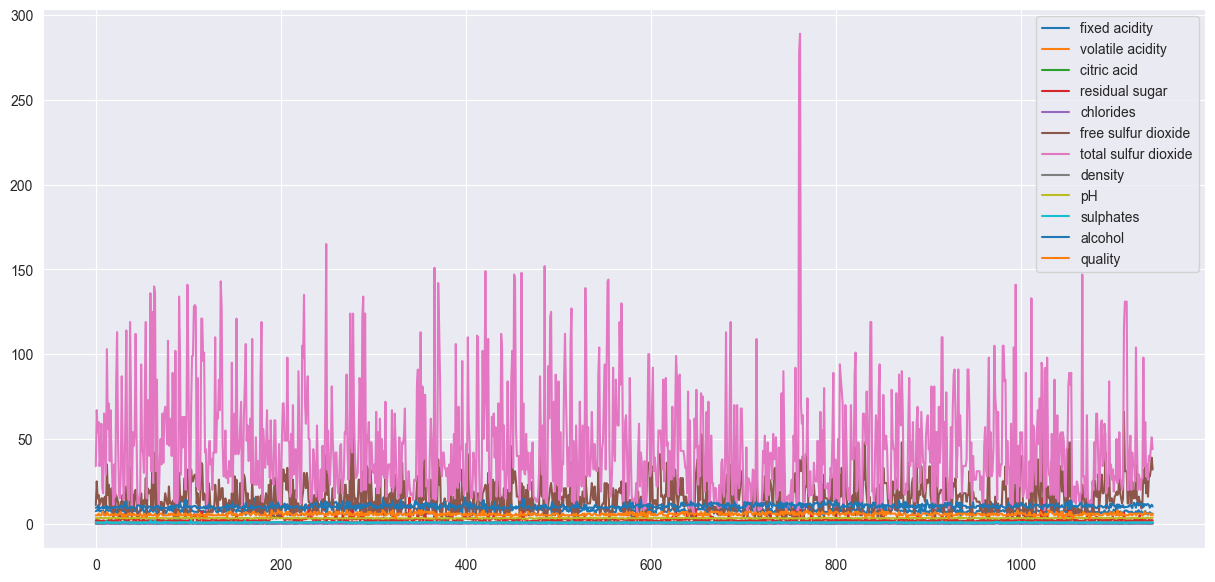

In [134]:
#graph all the data set - just for looking
df.plot(figsize=(15,7))

Lets group the dataset by Quality's Mean and plot the dataset again

<Axes: xlabel='quality'>

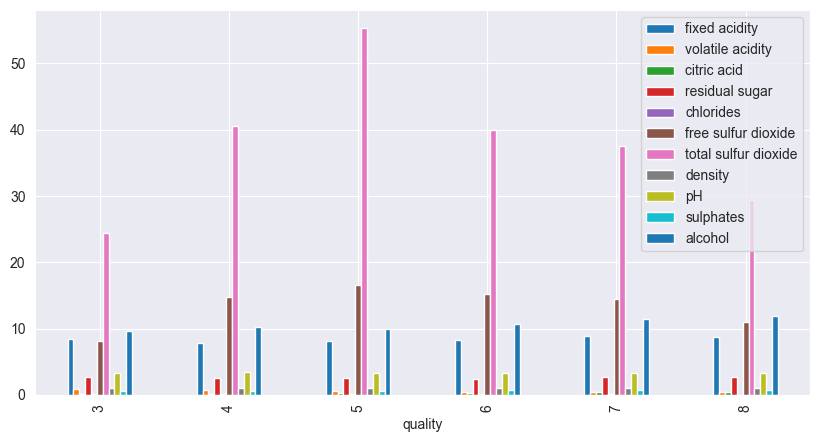

In [135]:
# making Group by quality

ave_qu = df.groupby("quality").mean()
ave_qu.plot(kind='bar', figsize=(10,5))

So, now we can see the clear difference between the elements which have more effect on the quality of the Wine.
For Example:
* Alcohol
* Total sulfur dioxide
* Free sulfur dioxide 

But we cannot ignore the other variables.

So, now we can jump into Model Building as we are now satisfied with our Input Variables!

In [155]:
# Convert quality to binary
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Model Building

In [157]:
#Preparing Dataset for the Model Building

X = df.drop(["quality", "quality_binary"], axis=1)
y = df["quality_binary"]

In [223]:
# Splitting the Dataset into Test and Training Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
# Defining and adjusting the Decision Tree
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

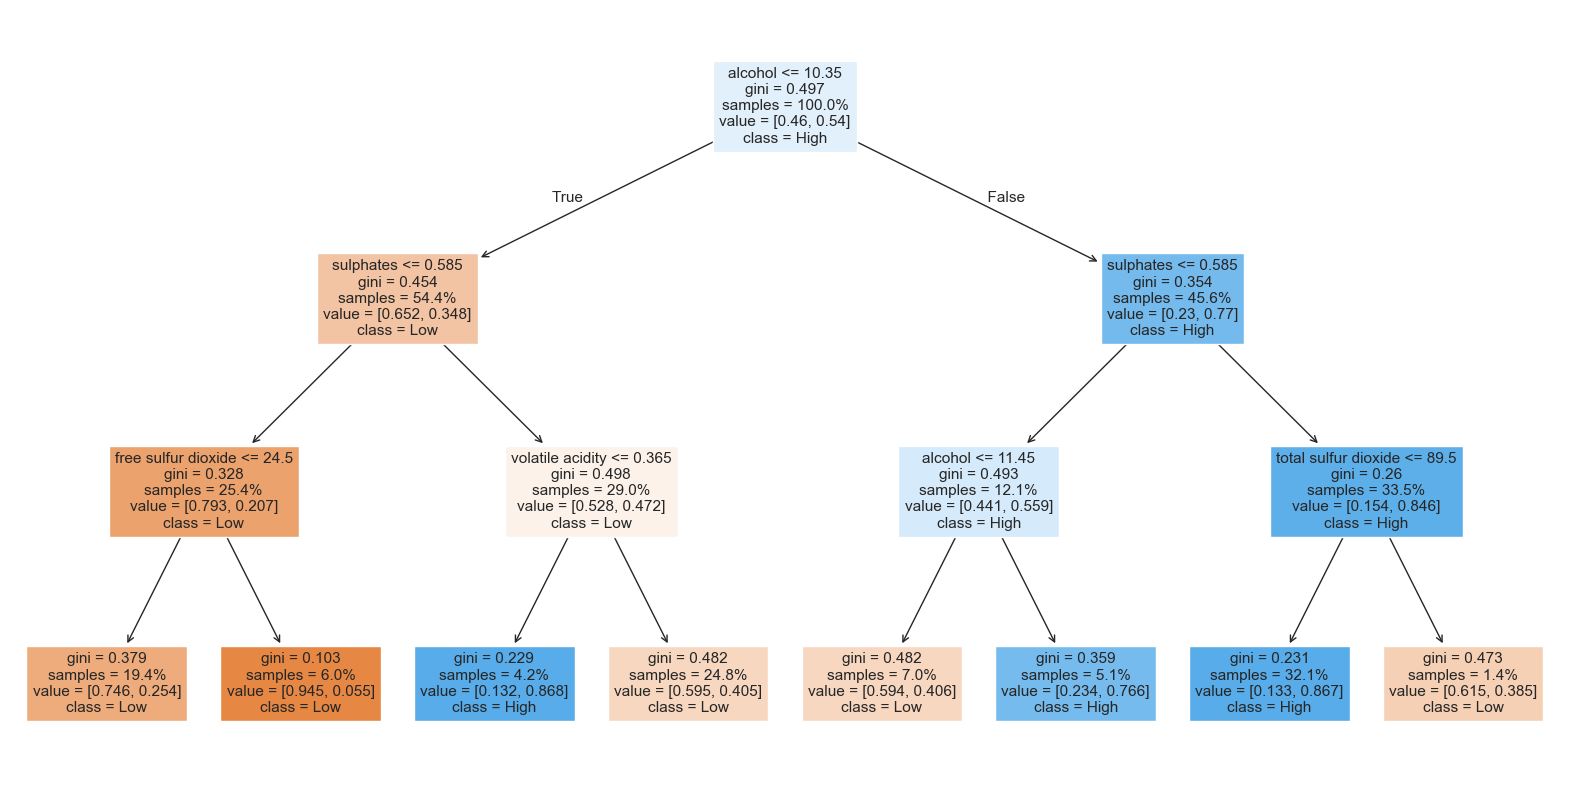

In [225]:
# Visualisierung des Entscheidungsbaums
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['Low', 'High'], proportion=True)
plt.show()

In [205]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy (Genauigkeit) des Klassifikators bei den Testdaten: {accuracy:.2f}")

Accuracy (Genauigkeit) des Klassifikators bei den Testdaten: 0.73


# Klassifikationsmetriken

In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [207]:
# Vorhersagen für den Testsatz treffen
y_pred = model.predict(X_test)

### Konfusionsmatrix und manuelle Berechnung

In [208]:
# Berechne die Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)

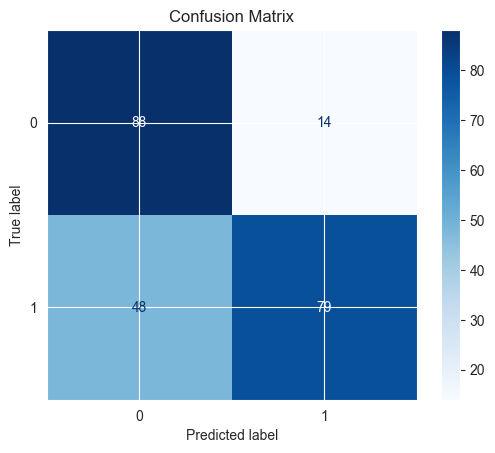

In [209]:
# Zeichne die Konfusionsmatrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [210]:
# Berechne die Genauigkeit manuell
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.73


In [211]:
# Berechne die Precision, den Recall und den F1-Wert.
precision = precision_score(y_test, y_pred, average='binary')  # for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Drucken der zusätzlichen Metriken
print(f"Precision on the test set: {precision:.2f}")
print(f"Recall on the test set: {recall:.2f}")
print(f"F1 Score on the test set: {f1:.2f}")

Precision on the test set: 0.85
Recall on the test set: 0.62
F1 Score on the test set: 0.72


### Klassifikationsreport

Die Ausgabe enthält:

* Precision: Der Anteil der korrekten Vorhersagen einer Klasse im Verhältnis zu allen Vorhersagen dieser Klasse.
* Recall: Der Anteil der korrekten Vorhersagen einer Klasse im Verhältnis zu allen tatsächlichen Fällen dieser Klasse in den Daten.
* F1-Score: Der harmonische Mittelwert aus Precision und Recall.
* Support: Die Anzahl der tatsächlichen Vorkommen jeder Klasse in y_test.

In [212]:
# Berechnen der Metriken für jede Klasse und zusammengefasst
report = classification_report(y_test, y_pred, target_names=['Low', 'High'])

# Drucken des Berichts
print(report)

              precision    recall  f1-score   support

         Low       0.65      0.86      0.74       102
        High       0.85      0.62      0.72       127

    accuracy                           0.73       229
   macro avg       0.75      0.74      0.73       229
weighted avg       0.76      0.73      0.73       229



Die Begriffe "macro avg" und "weighted avg" in der Ausgabe von classification_report sind zwei verschiedene Arten, wie Durchschnittswerte für Precision, Recall und den F1-Score über die verschiedenen Klassen hinweg berechnet werden. 

Macro Average (Makro-Durchschnitt)
* Macro Average berechnet den Durchschnitt der Metriken, indem es jede Klasse gleich behandelt, unabhängig von ihrer Häufigkeit (Support). Das bedeutet, dass alle Klassen das gleiche Gewicht in der Berechnung erhalten.
* Beispiel: Wenn du zwei Klassen hast, bei denen Klasse 1 in 95% der Daten vorkommt und Klasse 2 nur in 5%, wird jeder Klasse in der Berechnung des Macro Average der gleiche Stellenwert zugeschrieben.

Weighted Average (Gewichteter Durchschnitt)
* Weighted Average berechnet den Durchschnitt der Metriken, indem es die Unterstützung (Support) jeder Klasse als Gewicht verwendet. Das bedeutet, dass Klassen, die häufiger vorkommen, stärker in die Berechnung einfließen.
* Beispiel: Hierbei wird die Tatsache berücksichtigt, dass einige Klassen mehr Beispiele in den Daten haben als andere, was einen realistischeren Einblick in die Leistung des Modells in Bezug auf die tatsächliche Datenverteilung bietet.

### ROC Kurve

In [213]:
# Stelle sicher, dass das Modell Wahrscheinlichkeiten schätzen kann, wenn es nicht von Haus aus dazu in der Lage ist (wie z. B. einige SVMs).
y_scores = model.predict_proba(X_test)[:, 1]  # die Wahrscheinlichkeitsschätzungen für die positive Klasse erhalten

In [214]:
y_scores

array([0.40528634, 0.40528634, 0.40625   , 0.40528634, 0.8668942 ,
       0.8668942 , 0.40528634, 0.25423729, 0.40625   , 0.25423729,
       0.8668942 , 0.8668942 , 0.40625   , 0.8668942 , 0.40625   ,
       0.05454545, 0.86842105, 0.40625   , 0.25423729, 0.8668942 ,
       0.8668942 , 0.8668942 , 0.25423729, 0.8668942 , 0.25423729,
       0.25423729, 0.76595745, 0.8668942 , 0.25423729, 0.40528634,
       0.76595745, 0.40528634, 0.8668942 , 0.8668942 , 0.40625   ,
       0.40528634, 0.40528634, 0.8668942 , 0.8668942 , 0.86842105,
       0.8668942 , 0.25423729, 0.8668942 , 0.25423729, 0.25423729,
       0.25423729, 0.40625   , 0.8668942 , 0.05454545, 0.8668942 ,
       0.8668942 , 0.05454545, 0.25423729, 0.8668942 , 0.86842105,
       0.8668942 , 0.40625   , 0.8668942 , 0.86842105, 0.40528634,
       0.25423729, 0.8668942 , 0.8668942 , 0.8668942 , 0.8668942 ,
       0.40528634, 0.8668942 , 0.25423729, 0.40528634, 0.40625   ,
       0.86842105, 0.40528634, 0.38461538, 0.8668942 , 0.25423

In [215]:
# Berechne die Punkte der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [216]:
thresholds

array([       inf, 0.86842105, 0.8668942 , 0.76595745, 0.40625   ,
       0.40528634, 0.38461538, 0.25423729, 0.05454545])

In [217]:
tpr

array([0.        , 0.07086614, 0.5511811 , 0.62204724, 0.69291339,
       0.92125984, 0.92913386, 0.99212598, 1.        ])

In [218]:
fpr

array([0.        , 0.04901961, 0.1372549 , 0.1372549 , 0.26470588,
       0.54901961, 0.56862745, 0.91176471, 1.        ])

In [219]:
# Berechne die AUC
roc_auc = auc(fpr, tpr)

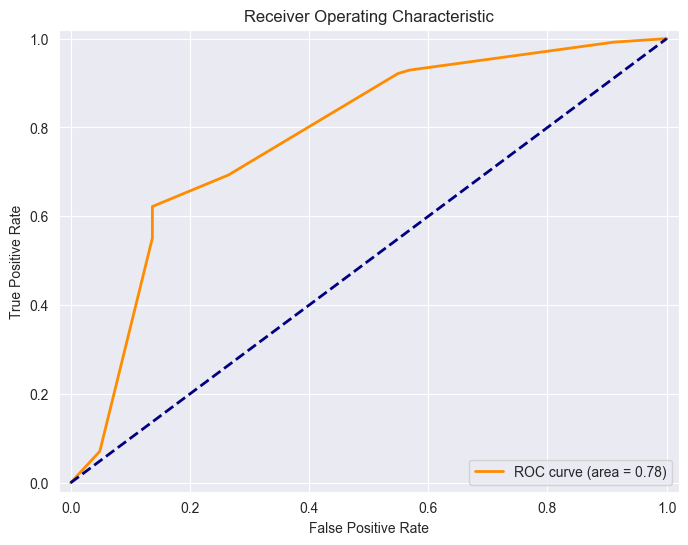

In [220]:
# Zeichne die ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Achte auf das "Knie" der Kurve: Dies ist in der Regel der Punkt, an dem Sie ein gutes Gleichgewicht zwischen TPR und FPR erreichen. In unserer Kurve scheint der Knick irgendwo bei einer FPR von 0,14 aufzutauchen, wo die TPR etwa 0,62 beträgt. Dieser Bereich könnte ein guter Kandidat für den Schwellenwert sein, wenn wir ein Gleichgewicht zwischen Sensitivität und Spezifität anstreben.

In [221]:
# Angenommen, fpr, tpr und Schwellenwerte sind bereits berechnet. Finde den Schwellenwert, der dem gewünschten FPR von 0,11 am nächsten kommt.
target_fpr = 0.11
closest_index = np.argmin(np.abs(fpr - target_fpr))  # Index des FPR, der dem Ziel am nächsten liegt
optimal_threshold = thresholds[closest_index]
print(f"Optimal threshold at FPR {fpr[closest_index]:.2f} is {optimal_threshold:.2f}")

Optimal threshold at FPR 0.14 is 0.87
